In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/income.csv')
df.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


In [4]:
type(df)

pandas.core.frame.DataFrame

<AxesSubplot:>

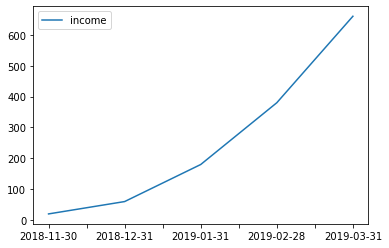

In [5]:
df.plot()

<AxesSubplot:>

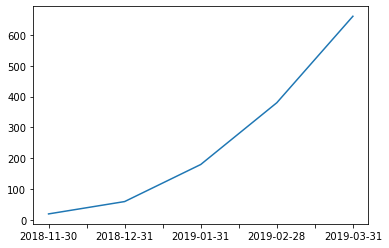

In [6]:
df['income'].plot()

<AxesSubplot:>

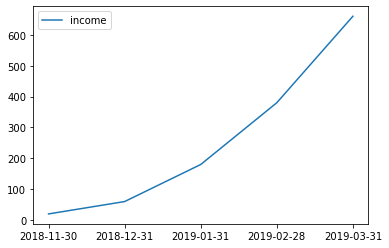

In [7]:
sns.lineplot(data=df)

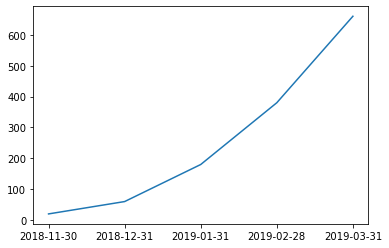

In [8]:
plt.plot(df.index, df.income)

<AxesSubplot:ylabel='income'>

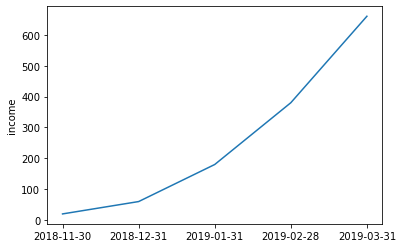

In [9]:
sns.lineplot(x=df.index, y=df.income)

<AxesSubplot:>

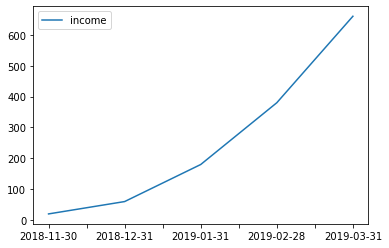

In [10]:
df.plot(kind='line')

<AxesSubplot:>

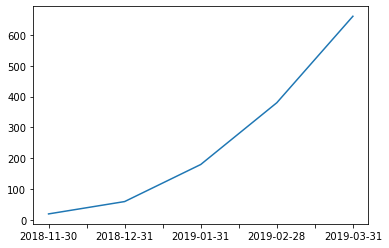

In [11]:
df.income.plot()

In [12]:
# задача по кластеризации
df = pd.read_csv('data/dataset_209770_6.txt')
df.head()

,x y
0,199.83324817032164 200.75505182173586
1,218.77108229329858 199.56732601557
2,606.6283264236463 901.4866775859573
3,612.142720413709 879.7690242386257
4,1315.6546733356497 500.2041327877369


In [13]:
df = pd.read_table('data/dataset_209770_6.txt', sep=' ', dtype='float')
df.head()

,x,y
0,199.833248,200.755052
1,218.771082,199.567326
2,606.628326,901.486678
3,612.142720,879.769024
4,1315.654673,500.204133


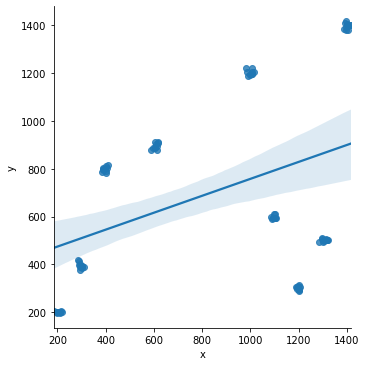

In [14]:
sns.lmplot(x='x', y='y', data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

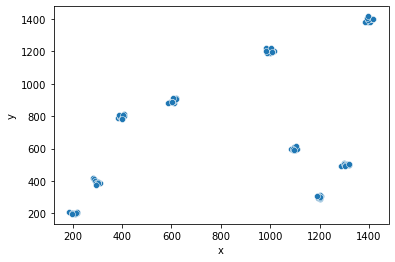

In [15]:
# Одно из решений предложденное авторами курса (выходит какая-то дичь если использовать header=False в pd.read_csv, похоже устарело решение):
df = pd.read_csv('data/dataset_209770_6.txt', sep=' ')
sns.scatterplot(df.iloc[:, 0], df.iloc[:, 1])

<AxesSubplot:xlabel='x', ylabel='y'>

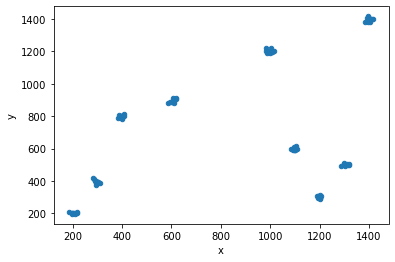

In [16]:
# Другие решения
df = pd.read_csv("data/dataset_209770_6.txt", sep = ' ')
df.plot.scatter(x = 'x', y = 'y')

<AxesSubplot:xlabel='x', ylabel='y'>

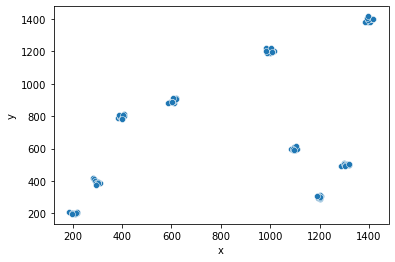

In [17]:
sns.scatterplot(x='x', y='y',
                data=pd.read_csv('data/dataset_209770_6.txt', sep=' '))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

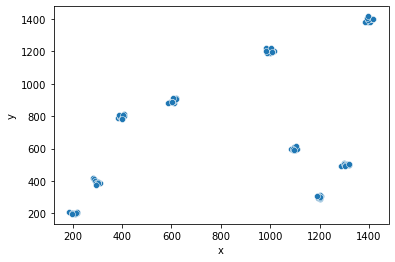

In [18]:
sns.scatterplot(df.x, df.y)

Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

Чтобы график отображался как на картинках, добавьте

g = # ваш код для создания теплокарты, укажите параметр cmap="viridis" для той же цветовой схемы
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [19]:
df = pd.read_csv('data/genome_matrix.csv', index_col=0)
df

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


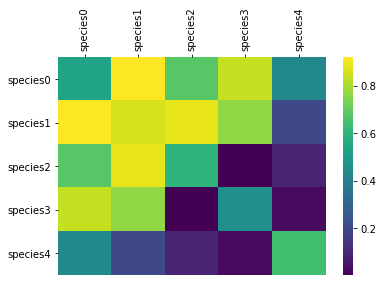

In [20]:
g = sns.heatmap(data=df, cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

# Пришло время узнать, кто самый главный рак какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

Это задание можно выполнить многими путями, и рисовать гистограмму вообще говоря для этого не нужно.

Данные взяты отсюда, на этом же сайте можно найти больше разнообразных данных по dota 2

In [21]:
df = pd.read_csv('data/dota_hero_stats.csv', index_col=0)
df.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [22]:
# Мое решение
df['n_roles'] = df.roles.apply(lambda x: x.count(',') + 1)
df.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles,n_roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


<AxesSubplot:xlabel='n_roles', ylabel='Count'>

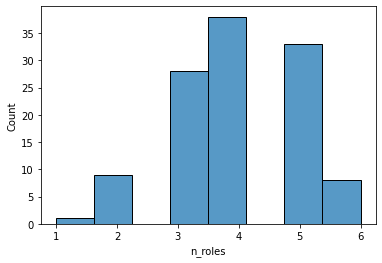

In [23]:
sns.histplot(df, x='n_roles')

In [24]:
# Решения других
df['cnt'] = df.roles.str.count(',') + 1

In [25]:
df['sum_roles'] = df.roles.str.split(',').str.len()

In [26]:
# в pandas есть возможность поэлементной работы с текстом для Series через атрибут str
df.roles.str.split(',').apply(len).mode()

0    4
dtype: int64

In [27]:
# Еще один вариант без гистограммы:
df.roles.map(eval).map(len).mode()

0    4
dtype: int64

In [28]:
# Для любителей сразу получать ответ:
(df.roles.str.count(',') + 1).value_counts().idxmax()

4

# Теперь перейдём к цветочкам. Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

Распределение должно быть по всем образцам, без разделения на вид.
Чтобы построить на 1-ом графике распределения для каждого из параметров, можно воспользоваться петлёй

for column in df:
    # Draw distribution with that column
Ссылки для изучения:

In [29]:
df = pd.read_csv('data/iris.csv', index_col=0)
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


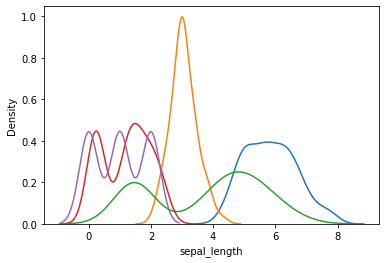

In [31]:
for column in df:
    sns.kdeplot(x=df[column])

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

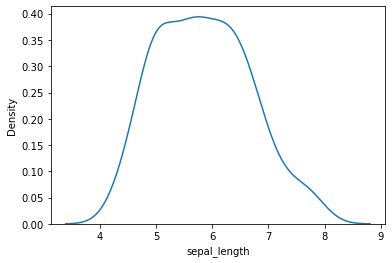

In [32]:
sns.kdeplot(x=df.sepal_length)

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

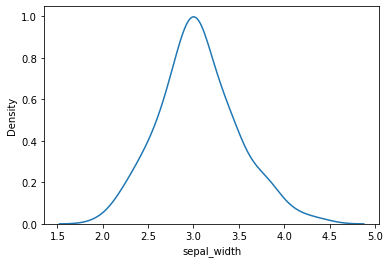

In [33]:
sns.kdeplot(x=df.sepal_width)

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

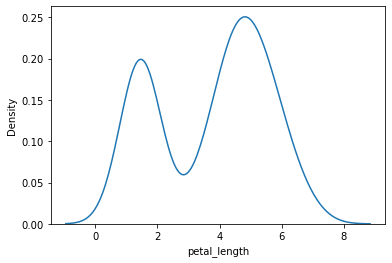

In [34]:
sns.kdeplot(x=df.petal_length)

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

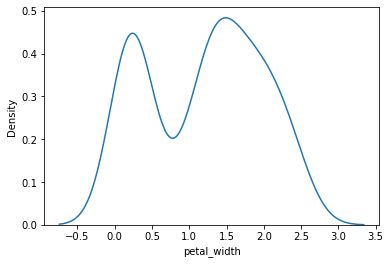

In [35]:
sns.kdeplot(x=df.petal_width)

<AxesSubplot:xlabel='species', ylabel='Density'>

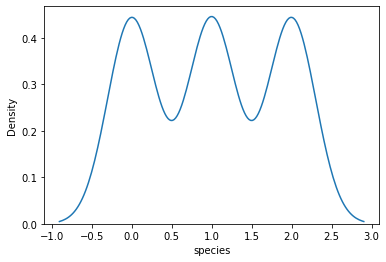

In [36]:
sns.kdeplot(x=df.species)

In [37]:
# так можно смотреть документацию: sns.kdeplot?

In [38]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

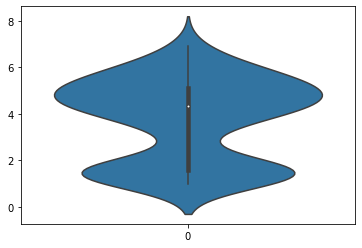

In [43]:
sns.violinplot(data=df.petal_length)

## Продолжаем изучение ирисов! Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных. Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?

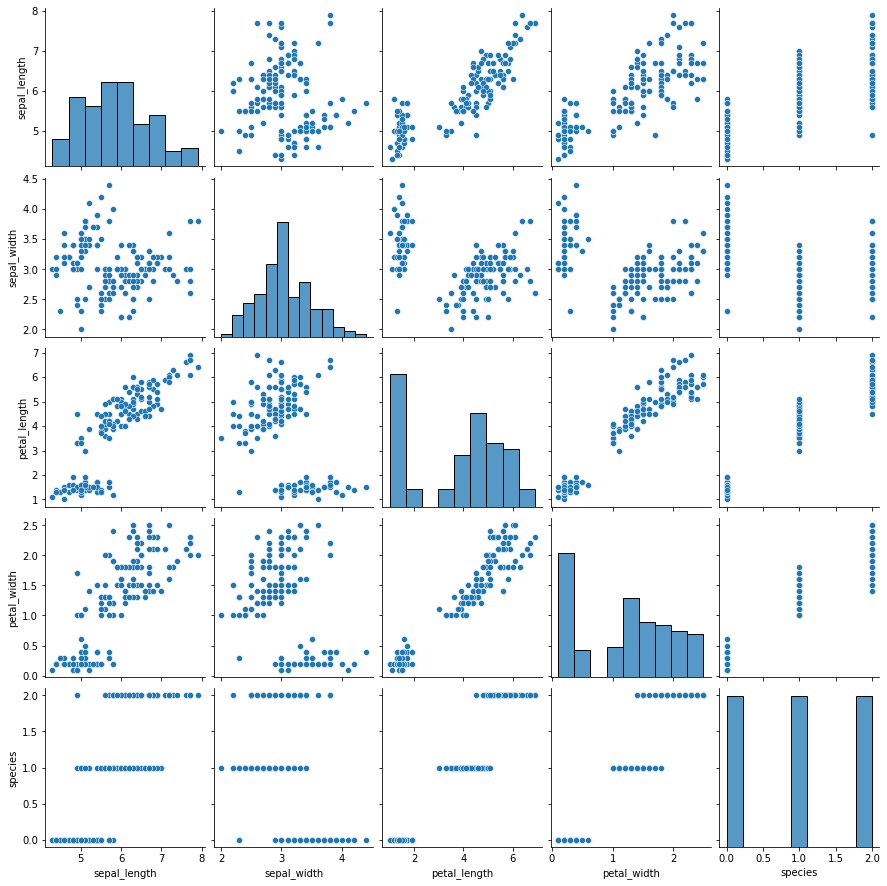

In [49]:
# Моё решение
sns.pairplot(df)
# Из графиков понятно, что между petal width и petal length наилучшая корреляция.
# Comment: "Напоминание: если совсем просто, то "коррелируют" == "меняются одинаково". Т.е. две величины коррелируют между собой, если изменение одной величины влечёт такое же изменение другой. Значит чем сильнее корреляция между двумя величинами xx и yy, тем меньше точки отклоняются от прямой y = xy=x."

# Решения других

<AxesSubplot:>

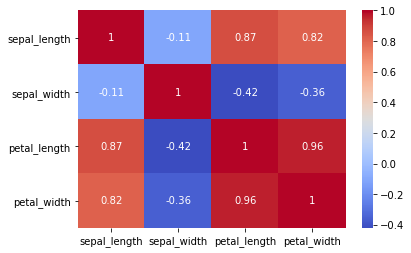

In [59]:
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap= 'coolwarm')

In [55]:
# corr() считает корреляцию
df.drop('species', axis=1).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


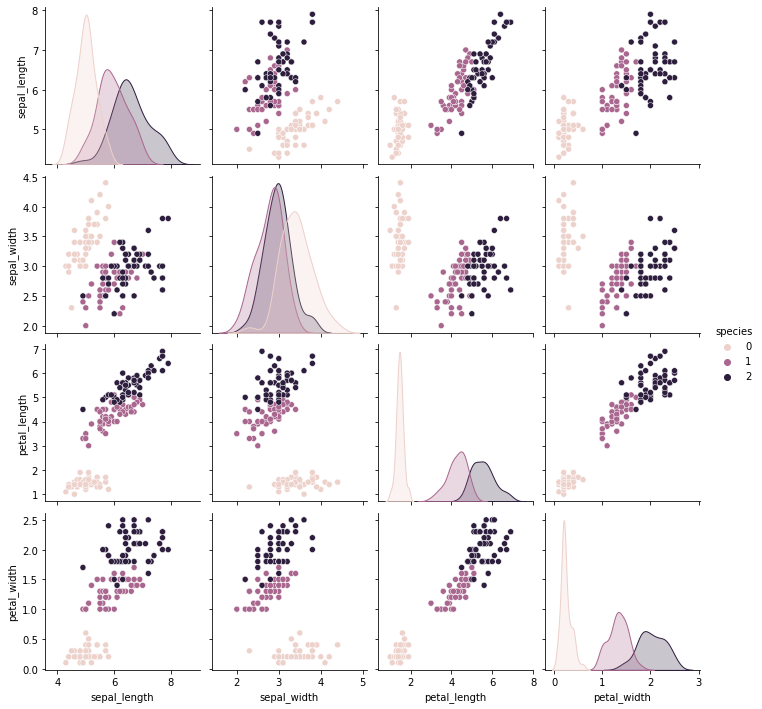

In [60]:
sns.pairplot(df, vars=df.columns[:4], hue="species")

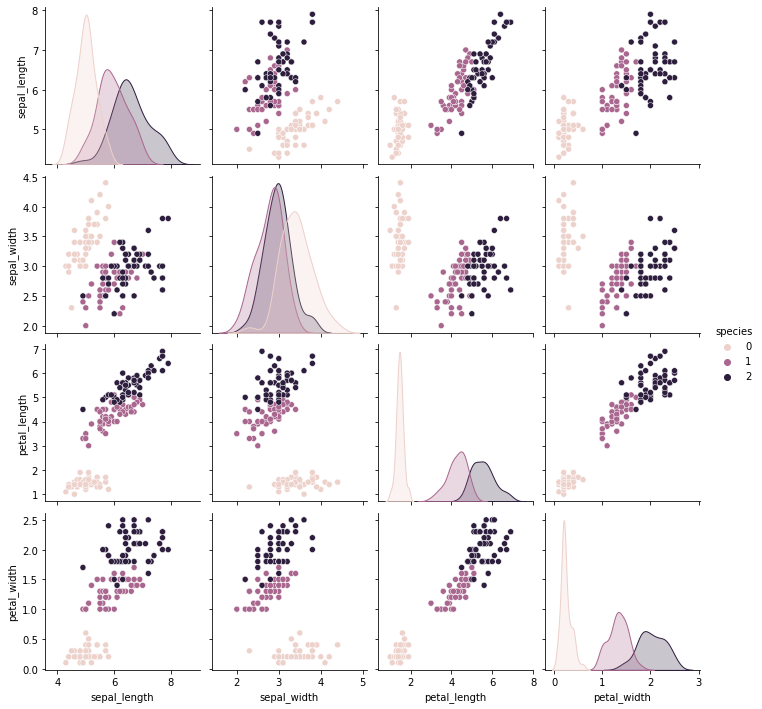

In [62]:
sns.pairplot(df, hue='species', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

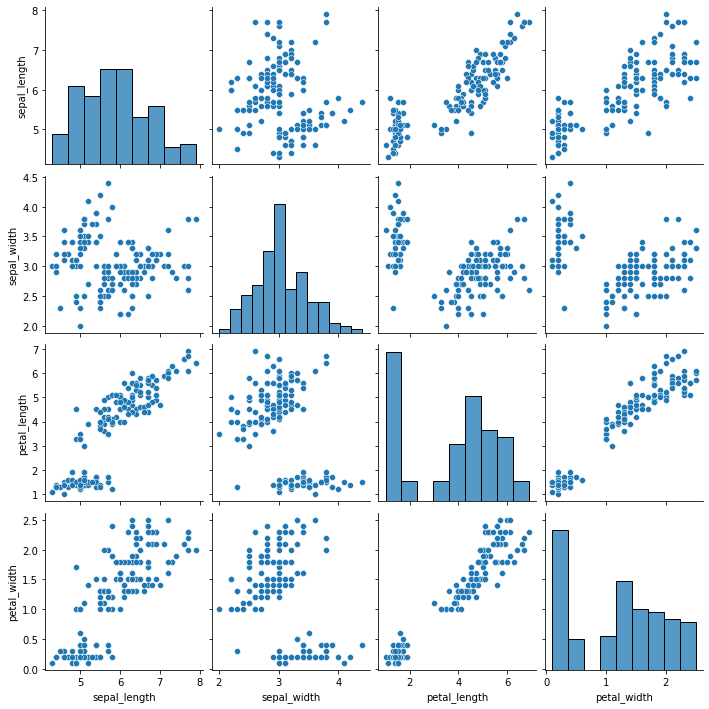

In [63]:
sns.pairplot(df.filter(like='al'))

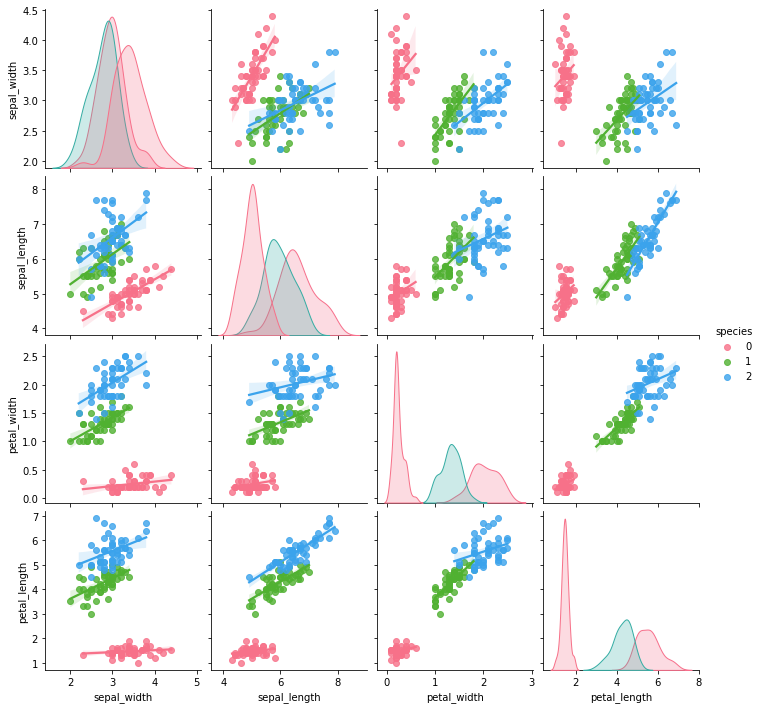

In [65]:
sns.pairplot(df, vars=["sepal_width", "sepal_length", 'petal_width', 'petal_length'],
             hue="species", palette="husl", kind="reg")